## Importing Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel("HousePricePrediction.xlsx")

In [3]:
print(dataset.head())

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [4]:
dataset.shape

(2919, 13)

## Data preprocessing

In [7]:
object_cols = dataset.select_dtypes(include = ["object"]).columns
print("Categoriable variables: ", len(object_cols))


Categoriable variables:  4


In [9]:
int_cols = dataset.select_dtypes(include= ["int64"]).columns
print("Integer variables: ", len(int_cols))

Integer variables:  6


In [10]:
float_cols = dataset.select_dtypes(include = ["float64"]).columns
print("Float variables : ", len(float_cols))

Float variables :  3


## Exploratory Data Analysis

In [11]:
numerical_dataset = dataset.select_dtypes(include = ["int64", "Float64"])


Heatmap saved as correlation_heatmap.png


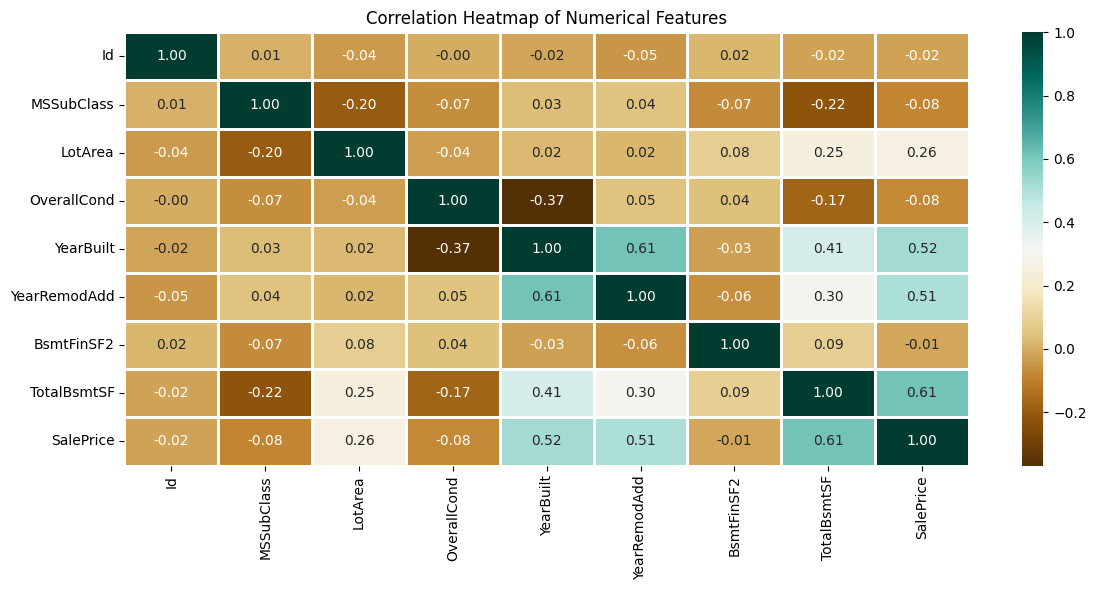

In [13]:
plt.figure(figsize= (12,6))
sns.heatmap(numerical_dataset.corr(),
             cmap = "BrBG",
             fmt= ".2f",
             linewidths= 2,
             annot = True)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
print("Heatmap saved as correlation_heatmap.png")

<Axes: title={'center': 'No. Unique values of categorical Features'}, xlabel='None'>

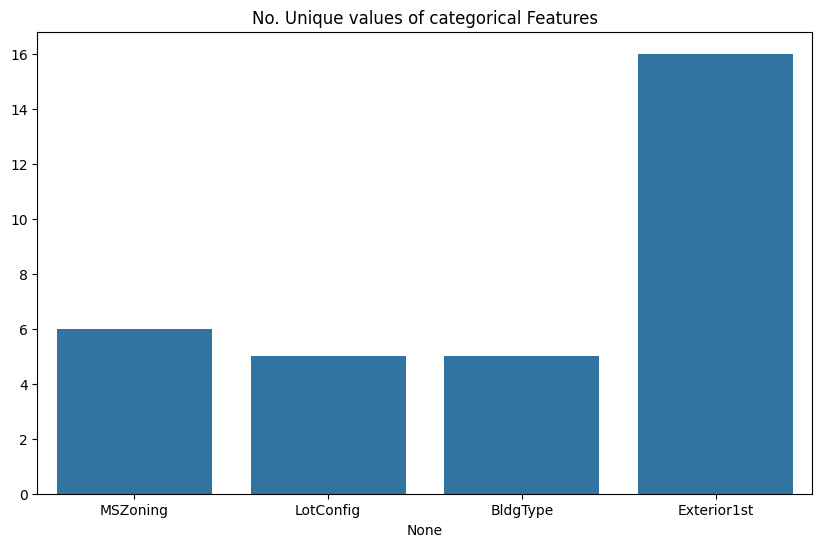

In [16]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)

plt.figure(figsize= (10,6))
plt.title("No. Unique values of categorical Features")
plt.xticks(rotation = 0)
sns.barplot(x= object_cols, y = unique_values)

Bargraph of each four features separately.

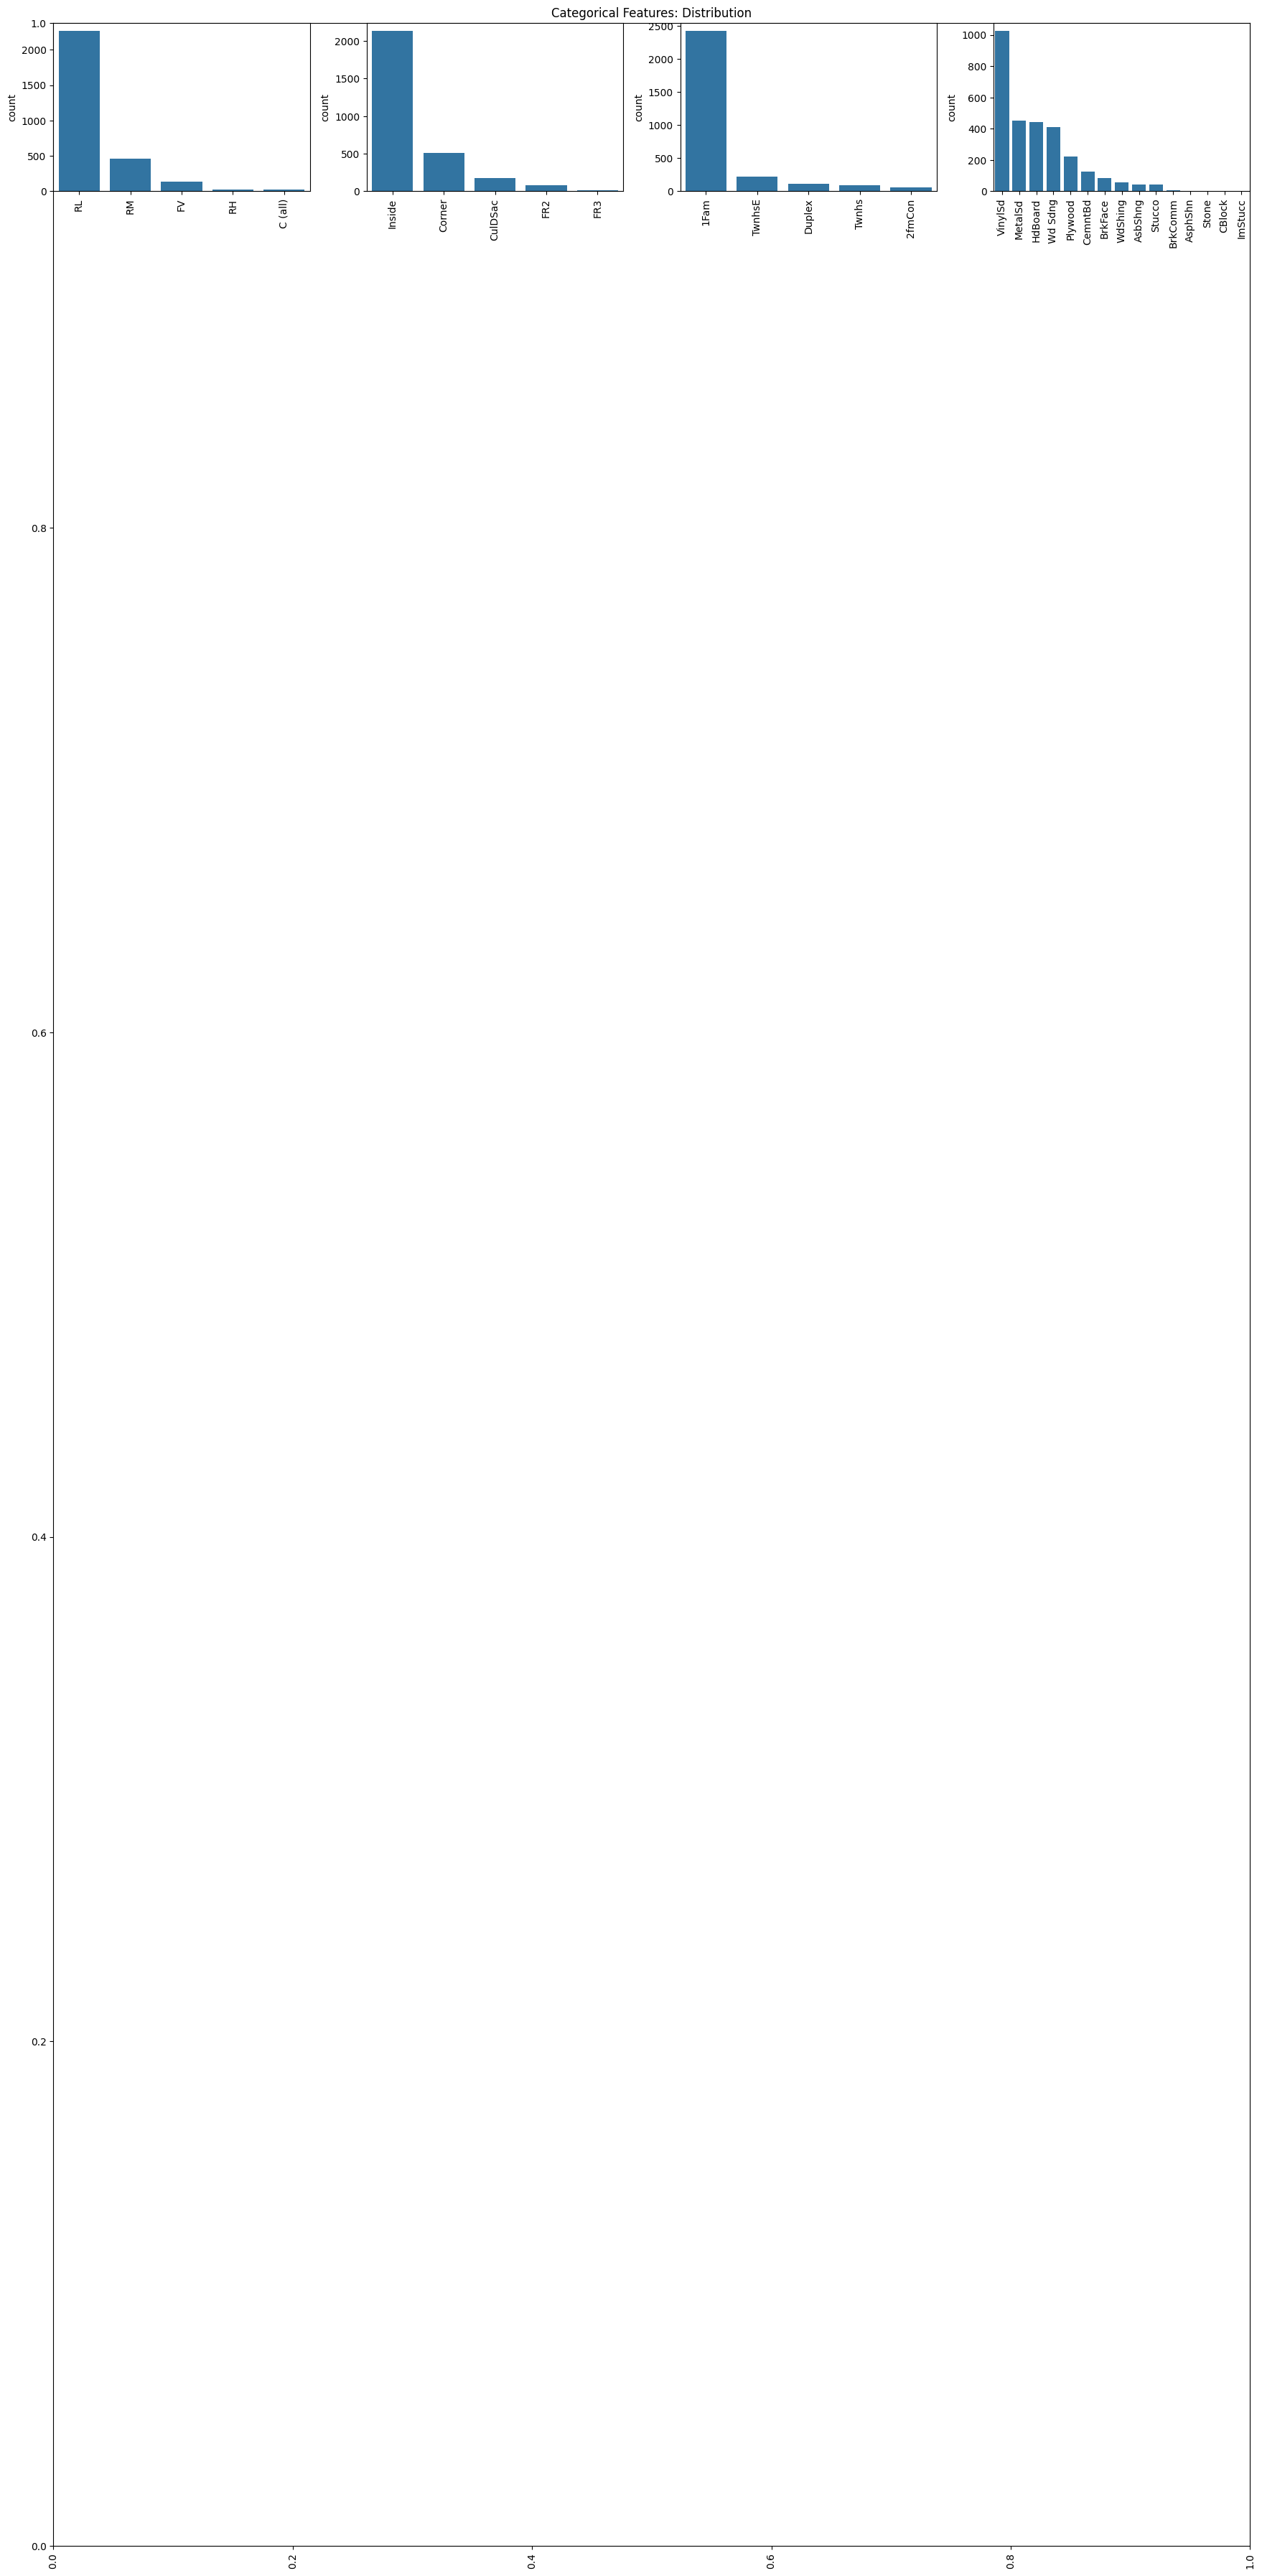

In [25]:
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1
plt.tight_layout()
plt.show()

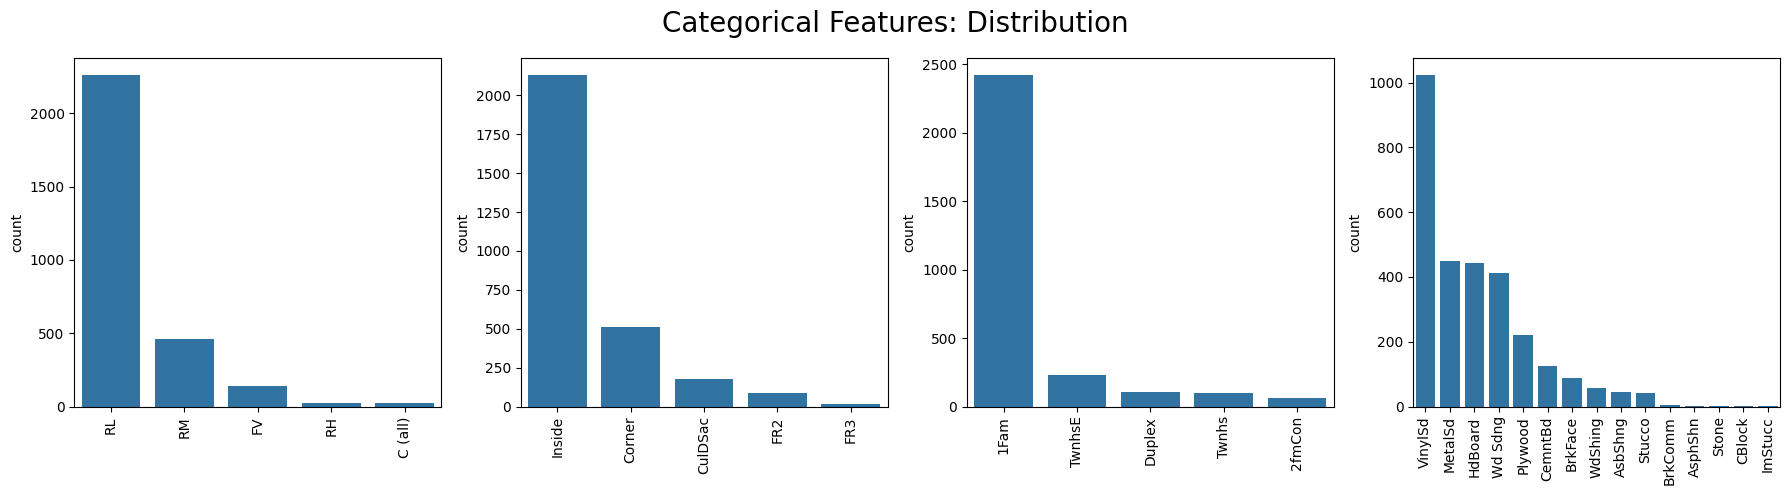

In [26]:
import math

cols = 4
rows = math.ceil(len(object_cols) / cols)

# Adjust height dynamically: e.g., 5 units of height per row
plt.figure(figsize=(18, rows * 5)) 
plt.suptitle('Categorical Features: Distribution', fontsize=20)

for index, col in enumerate(object_cols, 1):
    y = dataset[col].value_counts()
    plt.subplot(rows, cols, index)
    sns.barplot(x=list(y.index), y=y)
    plt.xticks(rotation=90)

plt.tight_layout() # This removes overlapping and extra margins
plt.show()

## Data Cleaning

In [27]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)

In [28]:
dataset.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [29]:
dataset["SalePrice"]= dataset["SalePrice"].fillna(dataset['SalePrice'].mean())

In [30]:
new_dataset = dataset.dropna()

In [31]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

## OneHotEncoder - For Label categorical features

In [32]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [33]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

## Splitting Dataset into Training and Testing

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split



In [37]:

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

##  Model Training and Accuracy

### 1. SVM - Support vector Machine

In [38]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

In [39]:
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423


### 2. Random Forest Regression

In [41]:
from sklearn.ensemble import RandomForestRegressor



In [42]:
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.1917065064929778

### 3. Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression



In [46]:
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18741683841599951


## Conclusion

### Clearly SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.18 approx. 